# GLOBAL SUPER MARKET SALES DATA ANALYSIS

In [1]:
#importing libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format
pd.options.mode.chained_assignment = None

plt.style.use('ggplot')

# import matplotlib.style as style # for styling the graphs
# style.use('seaborn-poster')
# style.use("fivethirtyeight")
# plt.rcParams['font.family'] = 'serif'
# sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : True})
%matplotlib inline

In [3]:
data=pd.read_csv("C:/Users/rosha/Desktop/Qspiders Internship/project/Global-Superstore.csv",encoding='unicode_escape')
df=data.copy()
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,7/31/2012,7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.00,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.65,7,0.00,762.18,933.57,Critical
1,26341,IN-2013-77878,2/5/2013,2/7/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.39,9,0.10,-288.76,923.63,Critical
2,25330,IN-2013-71249,10/17/2013,10/18/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.10,919.97,915.49,Medium
3,13524,ES-2013-1579342,1/28/2013,1/30/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.10,-96.54,910.16,Medium
4,47221,SG-2013-4320,11/5/2013,11/6/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.00,311.52,903.04,Critical


# EXPLOROATORY DATA ANALYSIS

In [4]:
# check shape and unique values
def check_df(df):
    print("##################### Shape #####################")
    print(df.shape)
    print("##################### Unique #####################")
    print(df.nunique())
check_df(df)

##################### Shape #####################
(51290, 24)
##################### Unique #####################
Row ID            51290
Order ID          25035
Order Date         1430
Ship Date          1464
Ship Mode             4
Customer ID        1590
Customer Name       795
Segment               3
City               3636
State              1094
Country             147
Postal Code         631
Market                7
Region               13
Product ID        10292
Category              3
Sub-Category         17
Product Name       3788
Sales             22995
Quantity             14
Discount             27
Profit            24575
Shipping Cost     10037
Order Priority        4
dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [5]:
# check missing values
def check_missing(df):
    print("##################### Missing #####################")
    print(df.isnull().sum())
    
check_missing(df)

##################### Missing #####################
Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


In [6]:
# check zero values

def check_zero(df):
    
    print("##################### Zero #####################")
    print(df.isin([0]).sum())
    
check_zero(df)

##################### Zero #####################
Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code           0
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount          29009
Profit              668
Shipping Cost         2
Order Priority        0
dtype: int64


In [7]:
df.drop("Postal Code",axis=1,inplace=True)

In [8]:
# show the missing values in dataset with ratio
def missing_values_tabl(df):
    
    na_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (df[na_columns].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio,2)], axis=1, keys=['n_miss', 'ratio'])
    missing_df = pd.DataFrame(missing_df)
    return missing_df

missing_values_tabl(df)

,n_miss,ratio


In [9]:
# check duplicates

def check_duplicates(df):
    print("##################### Duplicates #####################")
    print(df.duplicated().sum())
check_duplicates(df)

##################### Duplicates #####################
0


In [10]:
# check summary statistics

df.drop(["Row ID"],axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,51290.00,246.49,487.57,0.44,30.76,85.05,251.05,22638.48
Quantity,51290.00,3.48,2.28,1.00,2.00,3.00,5.00,14.00
Discount,51290.00,0.14,0.21,0.00,0.00,0.00,0.20,0.85
Profit,51290.00,28.61,174.34,-6599.98,0.00,9.24,36.81,8399.98
Shipping Cost,51290.00,26.38,57.30,0.00,2.61,7.79,24.45,933.57


# FEATURE ENGINEERING

In [11]:
# converting object to datetime

df["Order Date"]=pd.to_datetime(df["Order Date"])
df["Ship Date"]=pd.to_datetime(df["Ship Date"])

# creating new features

df["order year"]=df["Order Date"].dt.year
df["order_month"]=df["Order Date"].dt.month
df["ship year"]=df["Ship Date"].dt.year
df["ship_month"]=df["Ship Date"].dt.month

# unit price
df["unit_price"]=df["Sales"]/df["Quantity"]

# rename columns

df.rename(columns={"Order Date":"order_date","Ship Date":"ship_date","Order Priority":"order_priority","order year":"order_year","ship year":"ship_year"},inplace=True)

# check the time period of dataset

print("Min Date: {}".format(df["order_date"].min()))

Min Date: 2011-01-01 00:00:00


In [12]:
# Aykırı değer analizi:

num_cols=[col for col in df.columns if df[col].dtypes!="O" and col not in ["Row ID","order_year","ship_year","order_month",
                                                                           "ship_month","order_date","ship_date"]]

# #  outlier threshold:
def outlier_thresholds(dataframe,col_name,q1=0.05,q3=0.95):
    q1=dataframe[col_name].quantile(q1)
    q3=dataframe[col_name].quantile(q3)
    IQR=q3-q1
    
    up_limit=q3+1.5*IQR
    low_limit=q1-1.5*IQR
    
    return low_limit,up_limit

# # check outliers:
# # eğer değişkende aykırı değer varsa True döndürür, yoksa False döndürür.
def check_outliers(dataframe,col_name):
    low_limit,up_limit=outlier_thresholds(dataframe,col_name)
    if dataframe[(dataframe[col_name]<low_limit) | (dataframe[col_name]>up_limit)].any(axis=None):
         return True 
   
    else:
         return False
    
def replace_with_thresholds(dataframe, col):
    low_limit, up_limit = outlier_thresholds(dataframe, col)
    if low_limit > 0:
        dataframe.loc[(dataframe[col] < low_limit), col] = low_limit
        dataframe.loc[(dataframe[col] > up_limit), col] = up_limit
    else:
        dataframe.loc[(dataframe[col] > up_limit), col] = up_limit   
        
for col in num_cols:
     print(col, check_outliers(df, col))


Sales True
Quantity False
Discount False
Profit True
Shipping Cost True
unit_price True


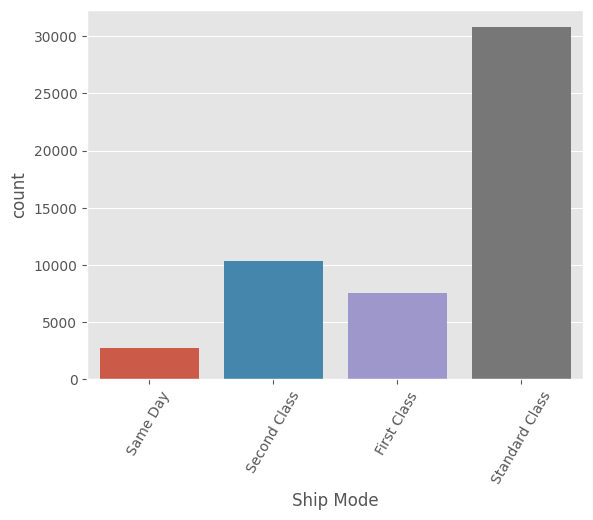

                Ship Mode  Ratio
Ship Mode                       
Standard Class      30775  60.00
Second Class        10309  20.10
First Class          7505  14.63
Same Day             2701   5.27
##########################################


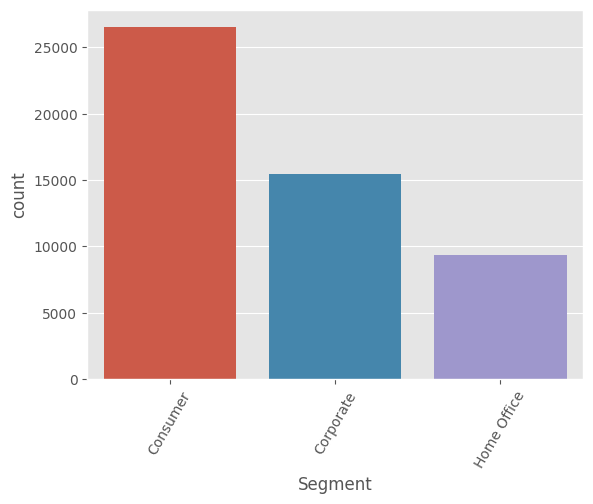

             Segment  Ratio
Segment                    
Consumer       26518  51.70
Corporate      15429  30.08
Home Office     9343  18.22
##########################################


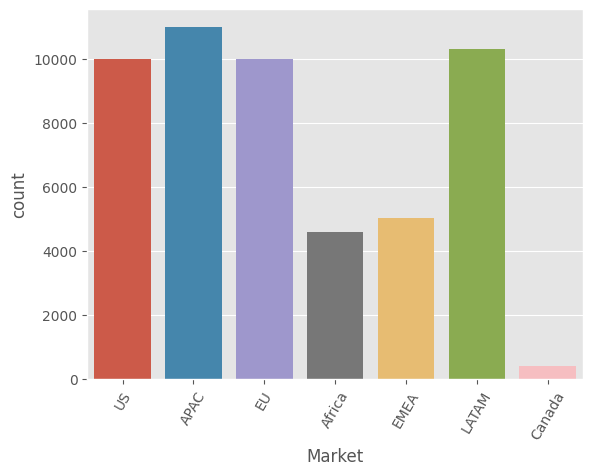

        Market  Ratio
Market               
APAC     11002  21.45
LATAM    10294  20.07
EU       10000  19.50
US        9994  19.49
EMEA      5029   9.81
Africa    4587   8.94
Canada     384   0.75
##########################################


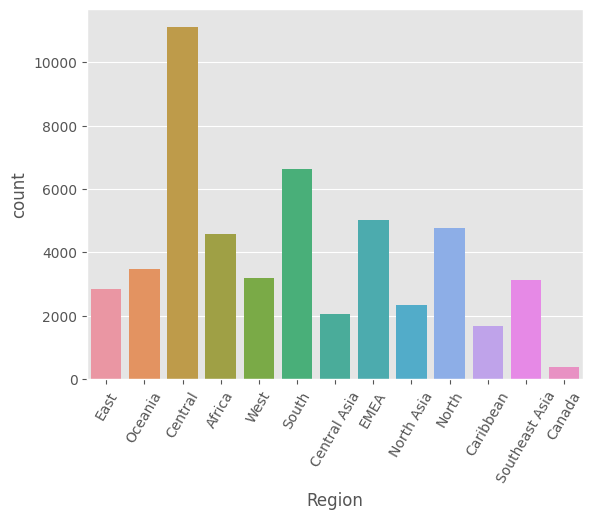

                Region  Ratio
Region                       
Central          11117  21.67
South             6645  12.96
EMEA              5029   9.81
North             4785   9.33
Africa            4587   8.94
Oceania           3487   6.80
West              3203   6.24
Southeast Asia    3129   6.10
East              2848   5.55
North Asia        2338   4.56
Central Asia      2048   3.99
Caribbean         1690   3.29
Canada             384   0.75
##########################################


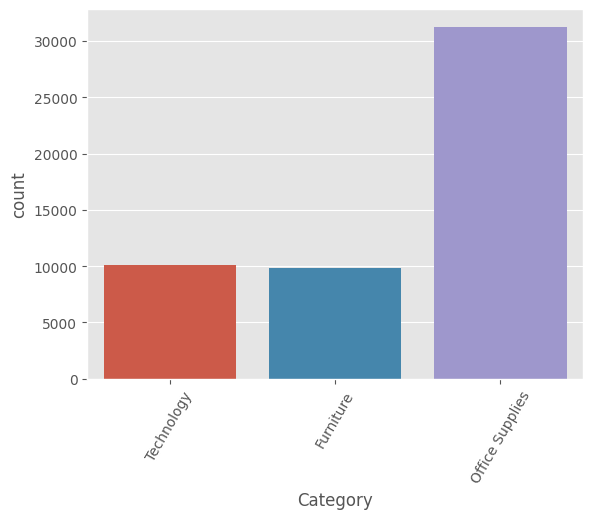

                 Category  Ratio
Category                        
Office Supplies     31273  60.97
Technology          10141  19.77
Furniture            9876  19.26
##########################################


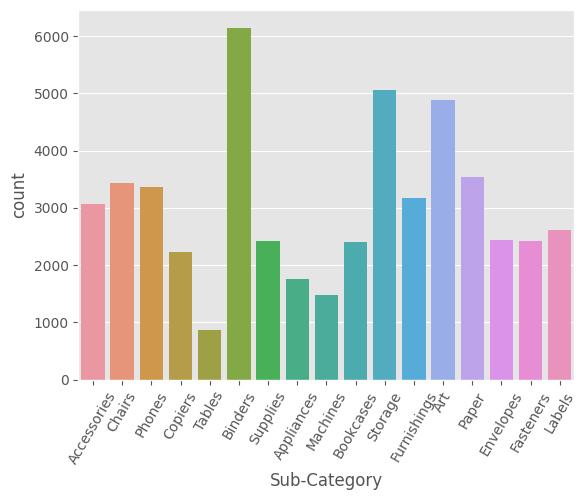

              Sub-Category  Ratio
Sub-Category                     
Binders               6152  11.99
Storage               5059   9.86
Art                   4883   9.52
Paper                 3538   6.90
Chairs                3434   6.70
Phones                3357   6.55
Furnishings           3170   6.18
Accessories           3075   6.00
Labels                2606   5.08
Envelopes             2435   4.75
Supplies              2425   4.73
Fasteners             2420   4.72
Bookcases             2411   4.70
Copiers               2223   4.33
Appliances            1755   3.42
Machines              1486   2.90
Tables                 861   1.68
##########################################


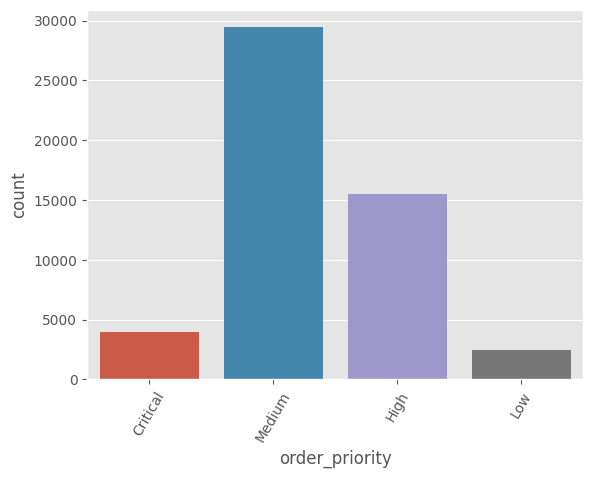

                order_priority  Ratio
order_priority                       
Medium                   29433  57.39
High                     15501  30.22
Critical                  3932   7.67
Low                       2424   4.73
##########################################


In [13]:
cat_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() <= 20]
num_cols = ["Sales", "Quantity", "Discount", "Profit", "Shipping Cost"]



def cat_summary(df,col,plot=False):
   
    if plot:
        sns.countplot(x=col,data=df)
        plt.xticks(rotation=60)
        plt.show()
    print(pd.DataFrame({col:df[col].value_counts(),
                       "Ratio":100*df[col].value_counts()/len(df)}))
    print("##########################################")

for i in cat_cols:
    cat_summary(df,i,plot=True)


*************************************


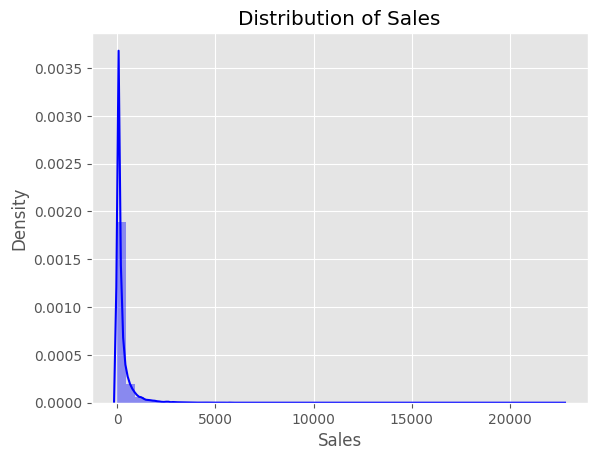

count   51290.00
mean      246.49
std       487.57
min         0.44
25%        30.76
50%        85.05
75%       251.05
max     22638.48
Name: Sales, dtype: float64
*************************************


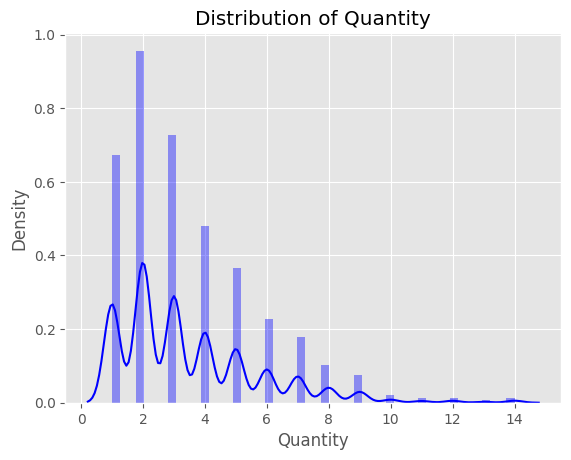

count   51290.00
mean        3.48
std         2.28
min         1.00
25%         2.00
50%         3.00
75%         5.00
max        14.00
Name: Quantity, dtype: float64
*************************************


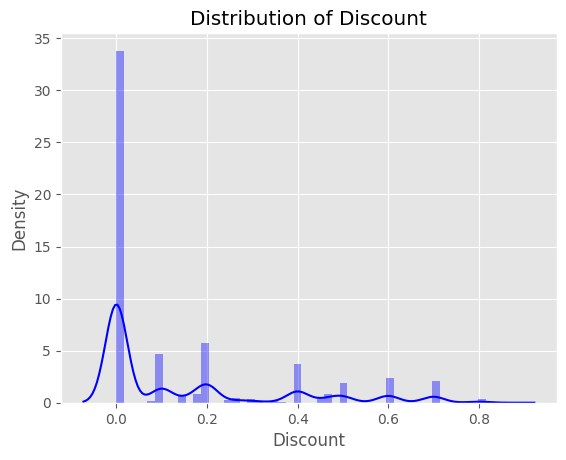

count   51290.00
mean        0.14
std         0.21
min         0.00
25%         0.00
50%         0.00
75%         0.20
max         0.85
Name: Discount, dtype: float64
*************************************


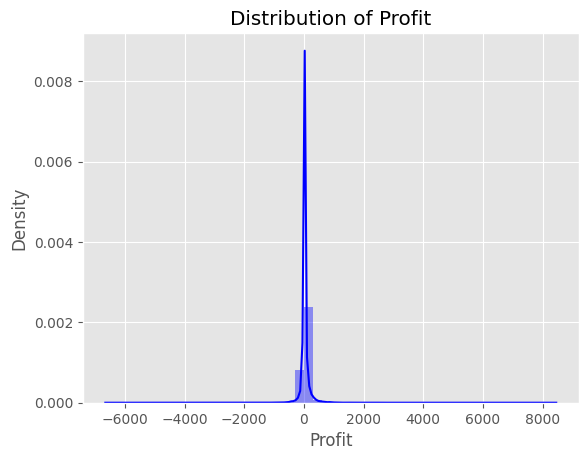

count   51290.00
mean       28.61
std       174.34
min     -6599.98
25%         0.00
50%         9.24
75%        36.81
max      8399.98
Name: Profit, dtype: float64
*************************************


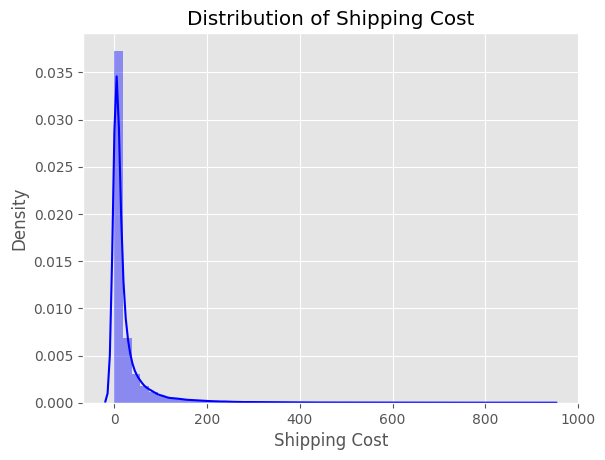

count   51290.00
mean       26.38
std        57.30
min         0.00
25%         2.61
50%         7.79
75%        24.45
max       933.57
Name: Shipping Cost, dtype: float64


In [14]:
# distribution of numerical features
colors = ['#7DBCE6','#EEBDEE','#EAEAAF','#8FE195','#E28181',
          '#87D8DB','#C2E37D','#DF93A4','#DCB778','#C497DE']


def num_summary(dataframe, col_name):

    quantiles = [0.25, 0.50, 0.75]
    
    print("*************************************")
    
    sns.distplot(dataframe[col_name], color="blue")
    plt.title("Distribution of {}".format(col_name))
    plt.show()
    print(dataframe[col_name].describe(quantiles).T)


for i in df[num_cols].columns:
    num_summary(df,i)

Text(0.5, 1.0, 'Correlation Between Features')

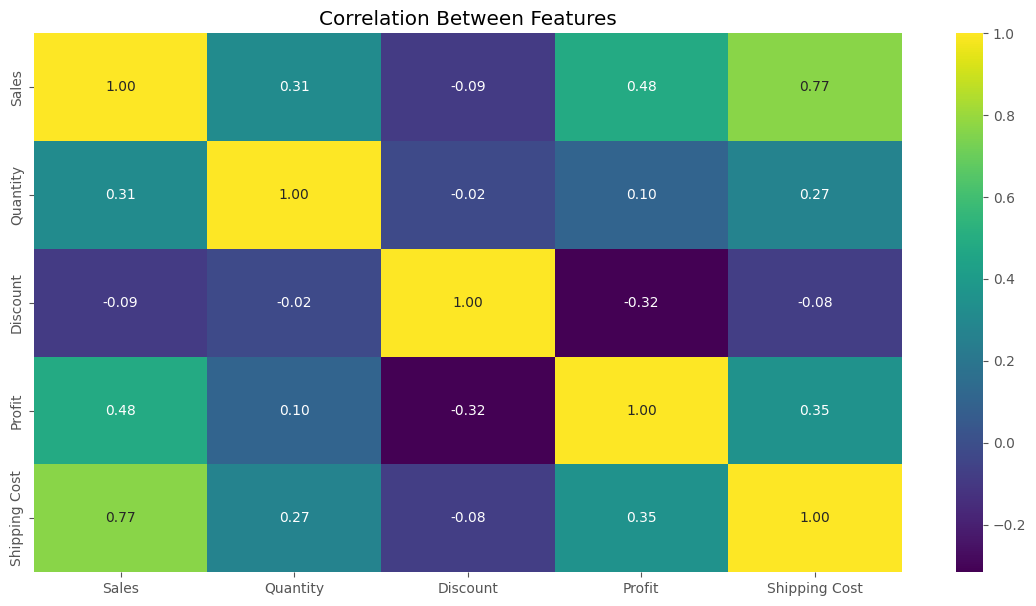

In [15]:
# correlation between numerical features

# correlation matrix:
corr=df[num_cols].corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr,annot=True,fmt=".2f",cmap="viridis")
plt.title("Correlation Between Features")

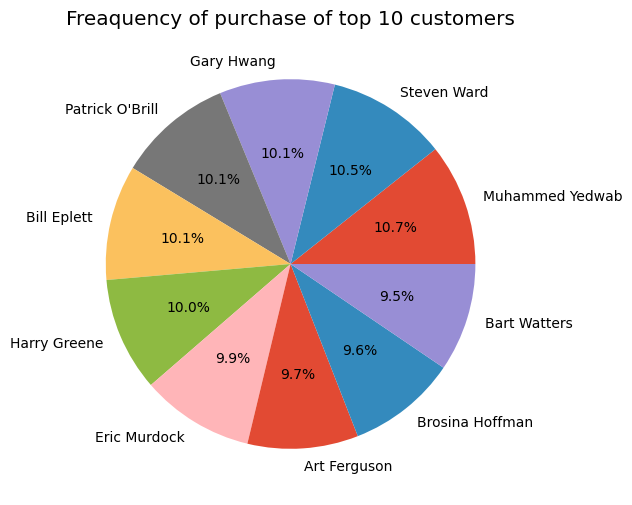

Customer Name
Muhammed Yedwab    108
Steven Ward        106
Gary Hwang         102
Patrick O'Brill    102
Bill Eplett        102
Harry Greene       101
Eric Murdock       100
Art Ferguson        98
Brosina Hoffman     97
Bart Watters        96
Name: count, dtype: int64

In [16]:
# freaquency of purchase of top 10 customers

a=df["Customer Name"].value_counts().sort_values(ascending=False).head(10)


plt.figure(figsize=(10,6))
plt.pie(a.head(10),labels=a.head(10).index,autopct="%1.1f%%")
plt.title("Freaquency of purchase of top 10 customers")
plt.show()

# show features like country ,city and region of each these customers 

a

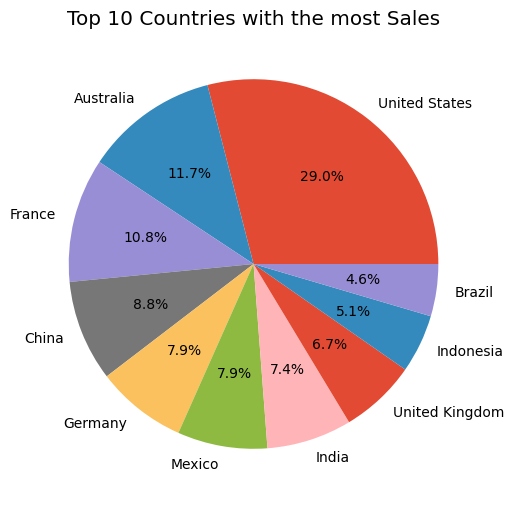

,Sales,Ratio
Country,,
United States,2297200.86,18.17
Australia,925235.85,7.32
France,858931.08,6.79
China,700562.03,5.54
Germany,628840.03,4.97
Mexico,622590.62,4.92
India,589650.10,4.66
United Kingdom,528576.30,4.18
Indonesia,404887.50,3.20


In [17]:
# top 10 countries with the most Sales

b=df.groupby("Country").agg({"Sales":"sum"}).sort_values("Sales",ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.pie(b["Sales"],labels=b.index,autopct="%1.1f%%")
plt.title("Top 10 Countries with the most Sales")
plt.show()

a=df.groupby("Country").agg({"Sales":"sum"}).sort_values("Sales",ascending=False).head(10)
b=100*a/df["Sales"].sum()
c=pd.concat([a,b],axis=1)
c.columns=["Sales","Ratio"]
c

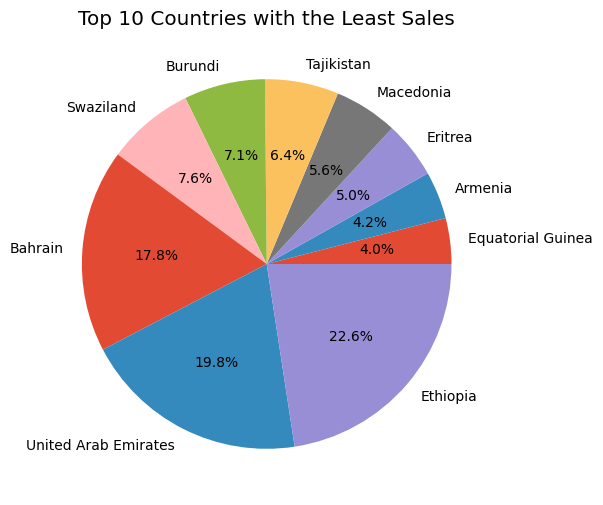

In [18]:
# top 10 countries with the least sales

c=df.groupby("Country").agg({"Sales":"sum"}).sort_values("Sales",ascending=True).head(10)

plt.figure(figsize=(10,6))
plt.pie(c["Sales"],labels=c.index,autopct="%1.1f%%")
plt.title("Top 10 Countries with the Least Sales")
plt.show()

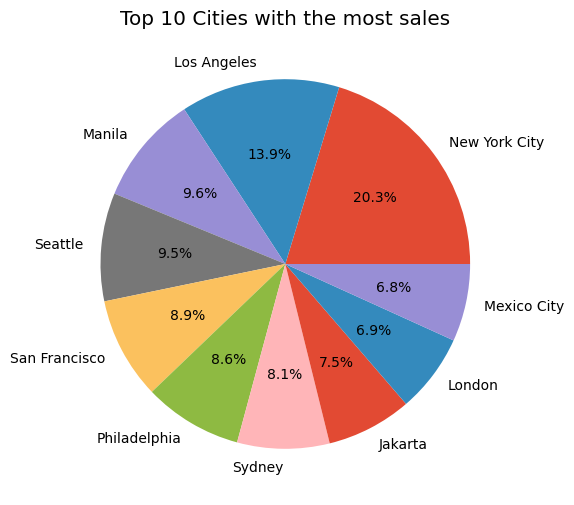

,Sales,Ratio
City,,
New York City,256368.16,2.03
Los Angeles,175851.34,1.39
Manila,120886.95,0.96
Seattle,119540.74,0.95
San Francisco,112669.09,0.89
Philadelphia,109077.01,0.86
Sydney,101945.52,0.81
Jakarta,94321.32,0.75
London,86945.80,0.69


In [19]:
# top 10 cities with the most sales

c=df.groupby("City").agg({"Sales":"sum"}).sort_values("Sales",ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.pie(c["Sales"],labels=c.index,autopct="%1.1f%%")
plt.title("Top 10 Cities with the most sales")
plt.show()

a=df.groupby("City").agg({"Sales":"sum"}).sort_values("Sales",ascending=False).head(10)
b=100*a/df["Sales"].sum()
c=pd.concat([a,b],axis=1)
c.columns=["Sales","Ratio"]
c

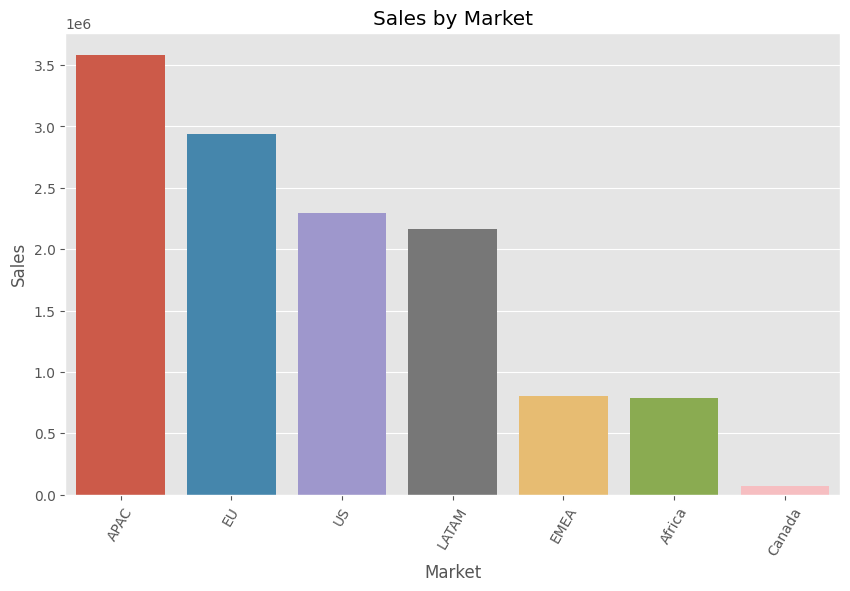

,Sales,Ratio
Market,,
APAC,3585744.13,28.36
EU,2938089.06,23.24
US,2297200.86,18.17
LATAM,2164605.17,17.12
EMEA,806161.31,6.38
Africa,783773.21,6.20
Canada,66928.17,0.53


In [20]:
# relationship between sales and market

a=df.groupby("Market").agg({"Sales":"sum"}).sort_values("Sales",ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=a.index,y=a["Sales"])
plt.xticks(rotation=60)
plt.title("Sales by Market")
plt.show()


a=df.groupby("Market").agg({"Sales":"sum"}).sort_values("Sales",ascending=False)
b=100*a/a.sum()
c=pd.concat([a,b],axis=1)
c.columns=["Sales","Ratio"]
c

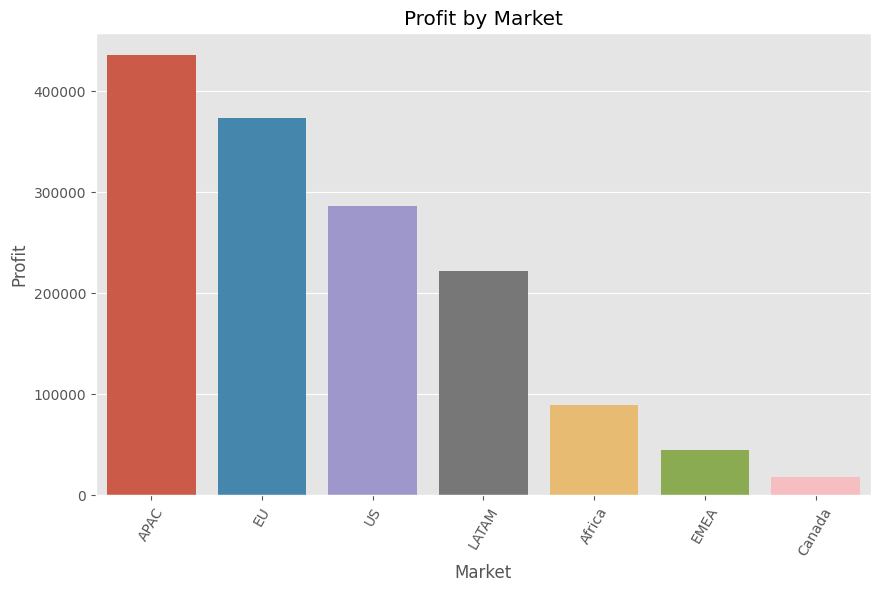

,Profit,Ratio
Market,,
APAC,436000.05,29.71
EU,372829.74,25.41
US,286397.02,19.52
LATAM,221643.49,15.10
Africa,88871.63,6.06
EMEA,43897.97,2.99
Canada,17817.39,1.21


In [21]:
# relationship between profit and market

a=df.groupby("Market").agg({"Profit":"sum"}).sort_values("Profit",ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=a.index,y=a["Profit"])
plt.xticks(rotation=60)
plt.title("Profit by Market")
plt.show()

a=df.groupby("Market").agg({"Profit":"sum"}).sort_values("Profit",ascending=False)
b=100*a/a.sum()
c=pd.concat([a,b],axis=1)
c.columns=["Profit","Ratio"]
c

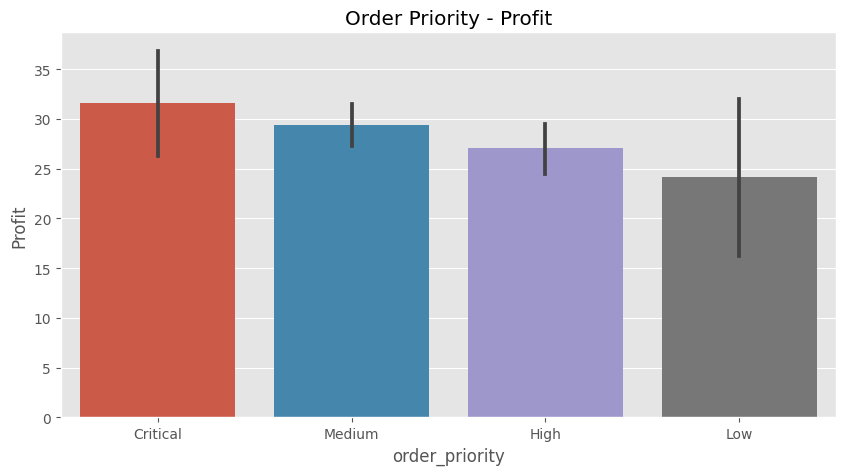

,Profit,Ratio
order_priority,,
Critical,31.59,110.42
Medium,29.36,102.62
High,27.12,94.79
Low,24.20,84.58


In [22]:
# relationship between order priority and profit:

plt.figure(figsize=(10,5))
sns.barplot(x="order_priority",y="Profit",data=df)
plt.title("Order Priority - Profit")
plt.show()

a=df.groupby("order_priority").agg({"Profit":"mean"}).sort_values("Profit",ascending=False)
b=100*a/df["Profit"].mean()
c=pd.concat([a,b],axis=1)
c.columns=["Profit","Ratio"]
c



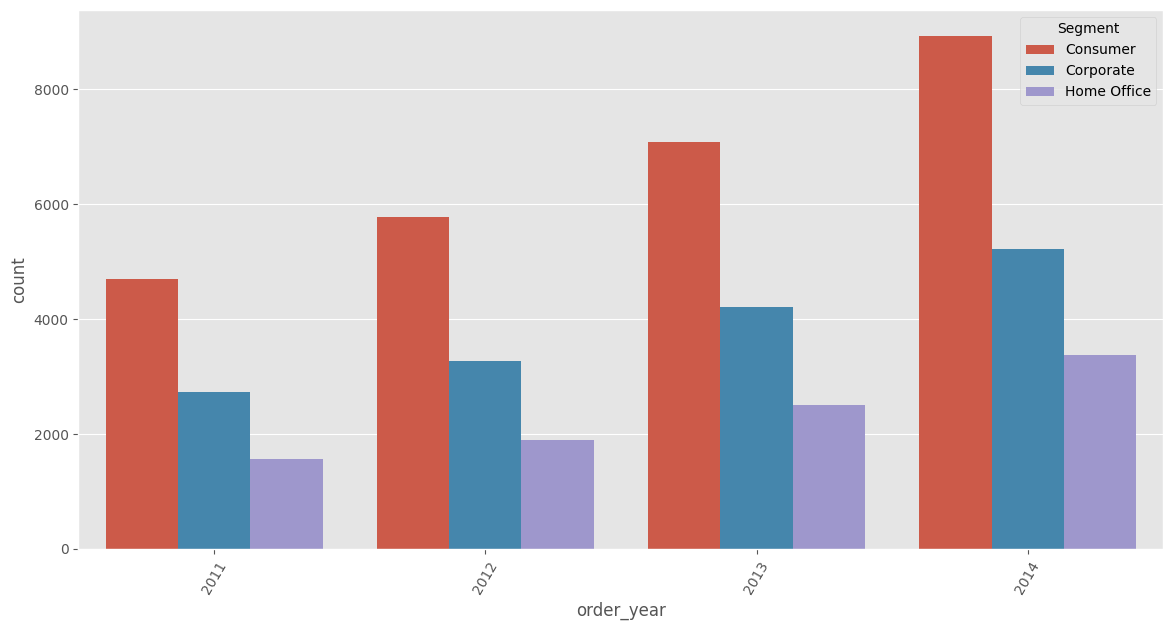

count of segment  ratio of segment
order_year Segment                                        
2011       Consumer                 4707             52.31
           Corporate                2733             30.37
           Home Office              1558             17.31
2012       Consumer                 5785             52.77
           Corporate                3279             29.91
           Home Office              1898             17.31
2013       Consumer                 7091             51.39
           Corporate                4205             30.47
           Home Office              2503             18.14
2014       Consumer                 8935             50.97
           Corporate                5212             29.73
           Home Office              3384             19.30

In [23]:
# distribution of segment in years

plt.figure(figsize=(14,7))

sns.countplot(x="order_year",hue="Segment",data=df)
plt.xticks(rotation=60)
plt.show()

# raito of segment in years

a=df.groupby(["order_year"])["Segment"].value_counts()
sum_profit=df.groupby(["order_year"])["Profit"].sum()
b=100 * a / a.groupby(level=0).sum()
c=pd.concat([a,b],axis=1)
c.columns=["count of segment","ratio of segment"]
c

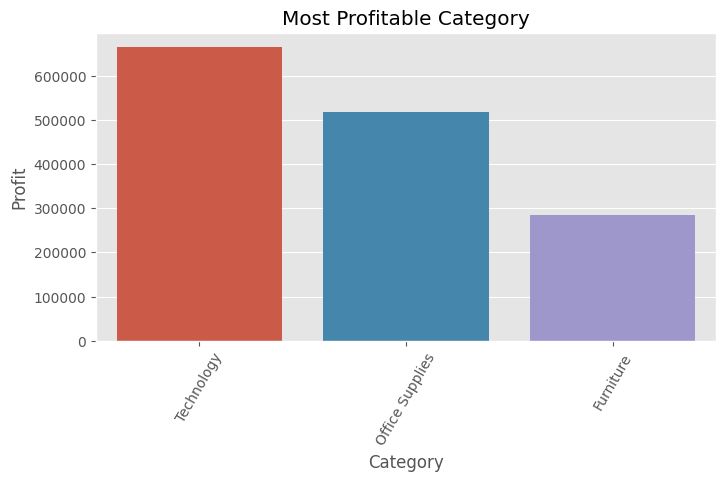

,total Profit,Ratio of Profit,count of category,Ratio of category
Category,,,,
Technology,663778.73,45.23,10141,19.77
Office Supplies,518473.83,35.33,31273,60.97
Furniture,285204.72,19.44,9876,19.26


In [24]:
# most profitable category

a=df.groupby("Category").agg({"Profit":"sum"}).sort_values("Profit",ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x=a.index,y=a["Profit"])
plt.xticks(rotation=60)
plt.title("Most Profitable Category")
plt.show()

# value counts of category


a=df.groupby("Category").agg({"Profit":"sum"}).sort_values("Profit",ascending=False)
a1=df["Category"].value_counts()
b=100*a/a.sum()
b1=100*a1/a1.sum()
c=pd.concat([a,b,a1,b1],axis=1)
c.columns=["total Profit","Ratio of Profit","count of category","Ratio of category"]
c



In [25]:
# 10 most profitable products

a=df.groupby("Product Name").agg({"Profit":"sum"}).sort_values("Profit",ascending=False).head(10)
b=100*a/df["Profit"].sum()
c=pd.concat([a,b],axis=1)
c.columns=["Profit","Ratio"]
c

,Profit,Ratio
Product Name,,
Canon imageCLASS 2200 Advanced Copier,25199.93,1.72
"Cisco Smart Phone, Full Size",17238.52,1.17
"Motorola Smart Phone, Full Size",17027.11,1.16
"Hoover Stove, Red",11807.97,0.80
"Sauder Classic Bookcase, Traditional",10672.07,0.73
"Harbour Creations Executive Leather Armchair, Adjustable",10427.33,0.71
"Nokia Smart Phone, Full Size",9938.20,0.68
"Cisco Smart Phone, with Caller ID",9786.64,0.67
"Nokia Smart Phone, with Caller ID",9465.33,0.65


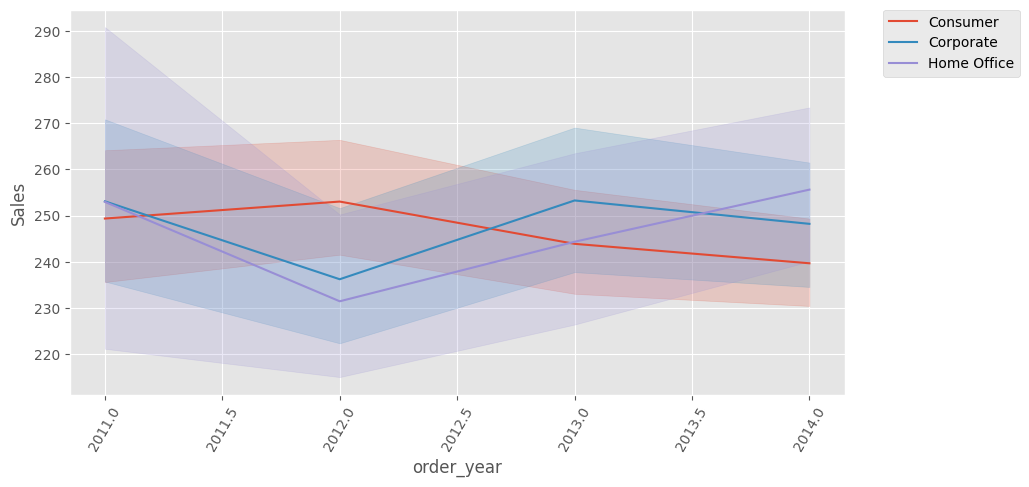

In [26]:
# relation between segment and order date:

plt.figure(figsize=(10,5))
sns.lineplot(x="order_year",y="Sales",hue="Segment",data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=60)
plt.show()


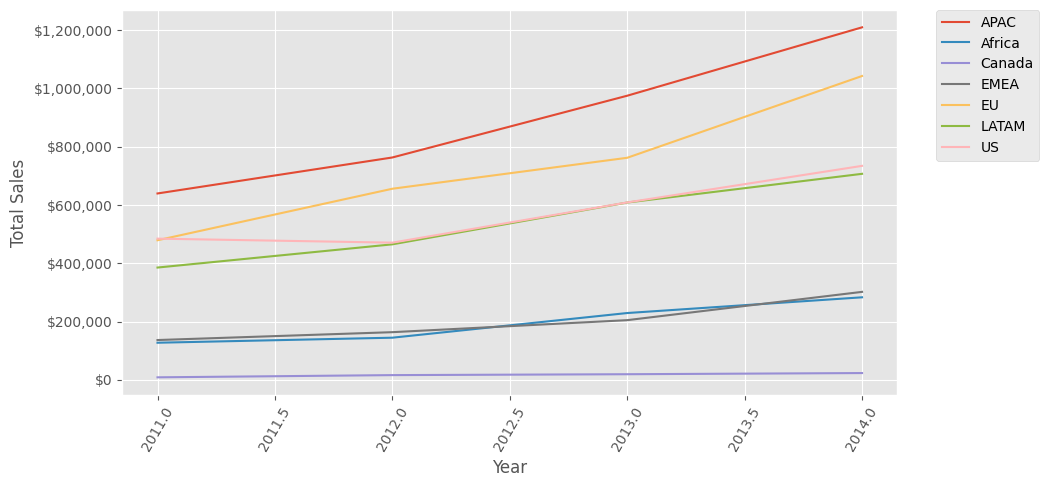

Sales  Ratio
order_year Market                  
2011       APAC    639245.26  28.29
           Africa  127187.27   5.63
           Canada    8509.11   0.38
           EMEA    136420.32   6.04
           EU      478743.28  21.19
           LATAM   385098.16  17.04
           US      484247.50  21.43
2012       APAC    762719.33  28.49
           Africa  144480.70   5.40
           Canada   16096.80   0.60
           EMEA    163414.36   6.10
           EU      655461.69  24.48
           LATAM   464733.30  17.36
           US      470532.51  17.57
2013       APAC    974580.86  28.62
           Africa  229068.79   6.73
           Canada   19161.15   0.56
           EMEA    204640.68   6.01
           EU      761680.36  22.36
           LATAM   608140.77  17.86
           US      608473.83  17.87
2014       APAC   1209198.69  28.12
           Africa  283036.44   6.58
           Canada   23161.11   0.54
           EMEA    301685.94   7.02
           EU     1042203.73  24.24
           LATAM   706632.94  16.43
           US      733947.02  17.07

In [27]:
# relation between market and sales:

from matplotlib import ticker as mtick

a=df.groupby(["order_year","Market"])["Sales"].sum()
a=pd.DataFrame(a)
b=100*a/a.groupby(level=0).sum()
c=pd.concat([a,b],axis=1)
c.columns=["Sales","Ratio"]


plt.figure(figsize=(10,5))
sns.lineplot(data=c,x=c.index.get_level_values(0),y="Sales",hue="Market")
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# changing y axis to thousands 
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick)
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()

c
    


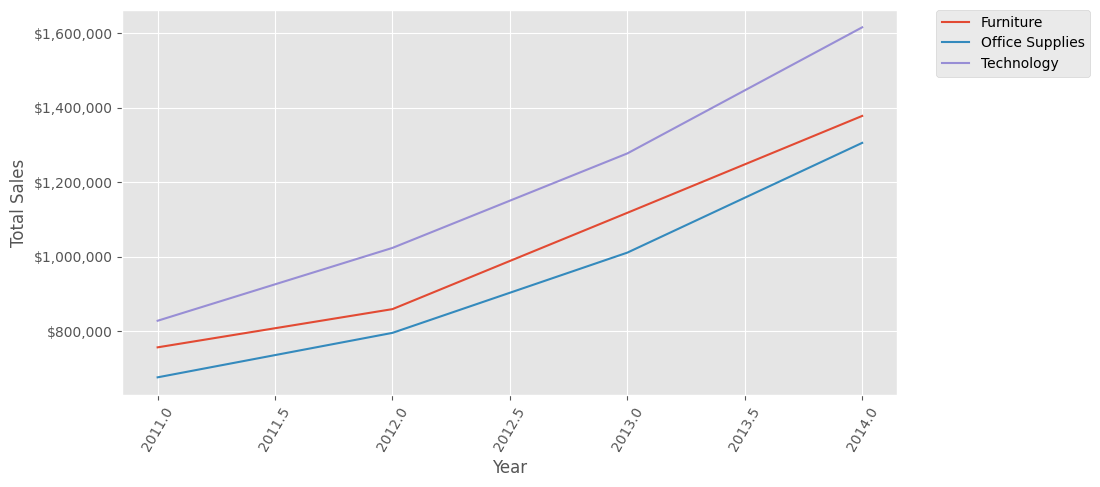

Sales  Ratio
order_year Category                         
2011       Furniture        756192.38  33.47
           Office Supplies  675606.45  29.90
           Technology       827652.06  36.63
2012       Furniture        858902.56  32.08
           Office Supplies  795094.63  29.70
           Technology      1023441.51  38.22
2013       Furniture       1117723.55  32.82
           Office Supplies 1010717.64  29.68
           Technology      1277305.25  37.50
2014       Furniture       1378055.69  32.05
           Office Supplies 1305651.51  30.36
           Technology      1616158.67  37.59

In [28]:
# relation between category and sales:

a=df.groupby(["order_year","Category"])["Sales"].sum()
a=pd.DataFrame(a)
b=100*a/a.groupby(level=0).sum()
c=pd.concat([a,b],axis=1)
c.columns=["Sales","Ratio"]


plt.figure(figsize=(10,5))
sns.lineplot(data=c,x=c.index.get_level_values(0),y="Sales",hue="Category")
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# changing y axis to thousands 
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick)
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()

c

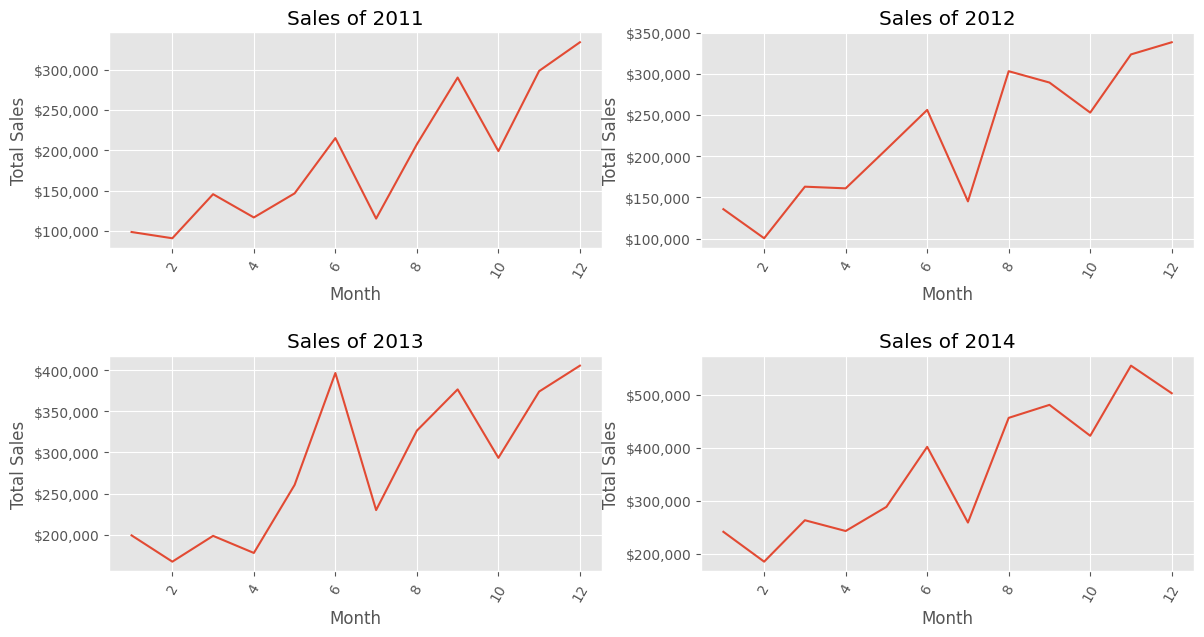

In [29]:
# relation between each year and sales:

a=df.groupby(["order_year","order_month"])["Sales"].sum()

b=100*a/a.sum()
c=pd.concat([a,b],axis=1)
c.columns=["Sales","Ratio"]


plt.figure(figsize=(14,7))

for i in range(2011,2015):
    plt.subplot(2,2,i-2010)
    plt.subplots_adjust(hspace = 0.5)
    sns.lineplot(data=c.loc[i],x=c.loc[i].index.get_level_values(0),y="Sales")
    plt.xticks(rotation=60)
    # changing y axis to thousands and $ sign
    fmt = '${x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    plt.gca().yaxis.set_major_formatter(tick)
    plt.xlabel("Month")
    plt.ylabel("Total Sales")
    plt.title("Sales of {}".format(i))

plt.show()




In [30]:
a=df.groupby(["Country","order_year","order_month"])["Sales"].sum()
b=100*a/a.sum()
c=pd.concat([a,b],axis=1)
c.columns=["Sales","Ratio"]
c.head(10)

Sales  Ratio
Country     order_year order_month               
Afghanistan 2011       4           1159.95   0.01
                       7            177.93   0.00
                       8             83.40   0.00
                       12           308.13   0.00
            2012       4           4626.15   0.04
                       6           1216.47   0.01
                       9           1397.94   0.01
                       12          1831.26   0.01
            2013       1            599.94   0.00
                       9           3083.55   0.02

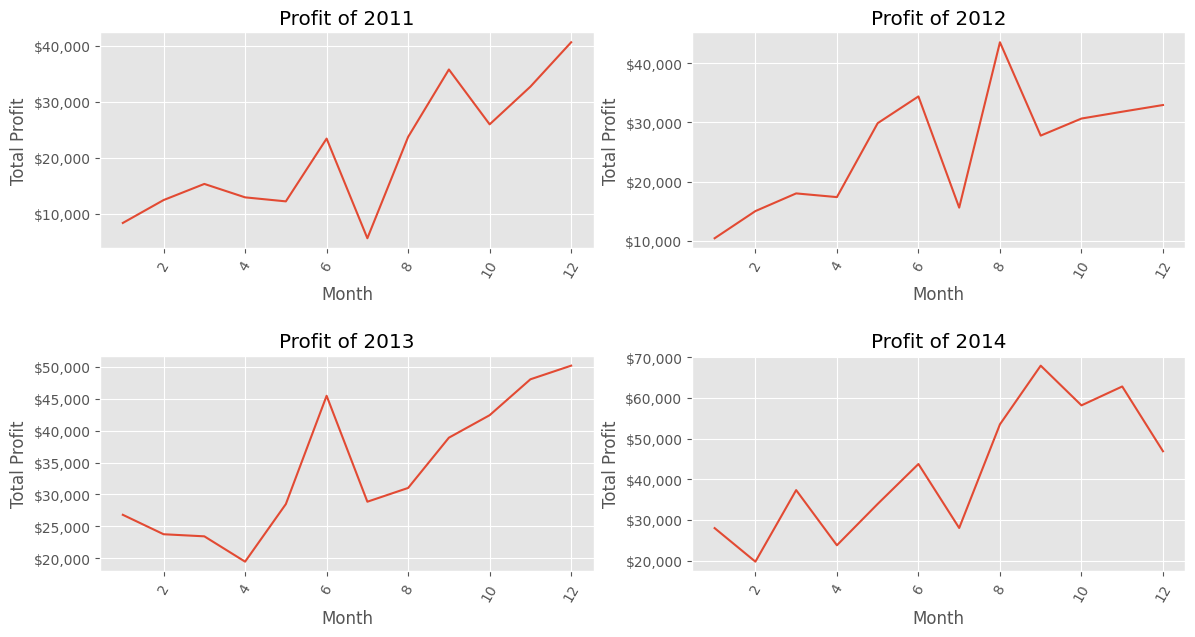

In [31]:
# relation between each year and profit:

a=df.groupby(["order_year","order_month"])["Profit"].sum()
b=100*a/a.sum()
c=pd.concat([a,b],axis=1)
c.columns=["Profit","Ratio"]


plt.figure(figsize=(14,7))
for i in range(2011,2015):
    plt.subplot(2,2,i-2010)
    plt.subplots_adjust(hspace = 0.5)
    sns.lineplot(data=c.loc[i],x=c.loc[i].index.get_level_values(0),y="Profit")
    plt.xticks(rotation=60)
    # changing y axis to thousands and $ sign
    fmt = '${x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    plt.gca().yaxis.set_major_formatter(tick)
    plt.xlabel("Month")
    plt.ylabel("Total Profit")
    plt.title("Profit of {}".format(i))

plt.show()

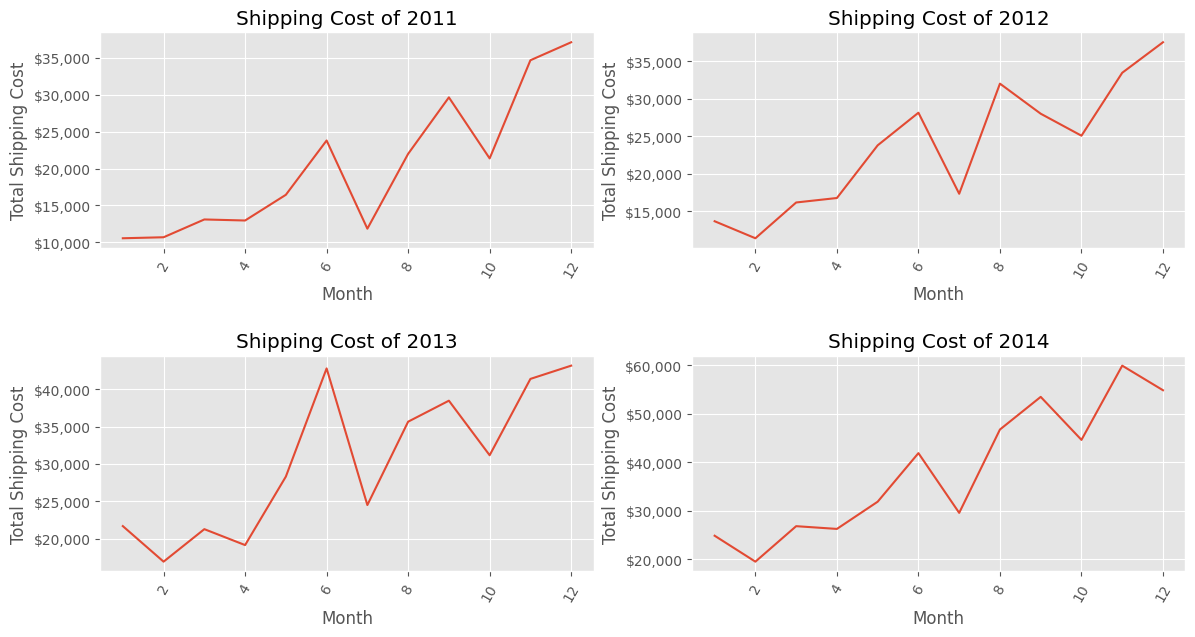

In [32]:
# relation between each year and shipping cost:

a=df.groupby(["order_year","order_month"])["Shipping Cost"].sum()
b=100*a/a.sum()
c=pd.concat([a,b],axis=1)
c.columns=["Shipping Cost","Ratio"]


plt.figure(figsize=(14,7))
for i in range(2011,2015):
    plt.subplot(2,2,i-2010)
    plt.subplots_adjust(hspace = 0.5)
    sns.lineplot(data=c.loc[i],x=c.loc[i].index.get_level_values(0),y="Shipping Cost")
    plt.xticks(rotation=60)
    # changing y axis to thousands and $ sign
    fmt = '${x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    plt.gca().yaxis.set_major_formatter(tick)
    plt.xlabel("Month")
    plt.ylabel("Total Shipping Cost")
    plt.title("Shipping Cost of {}".format(i))

plt.show()

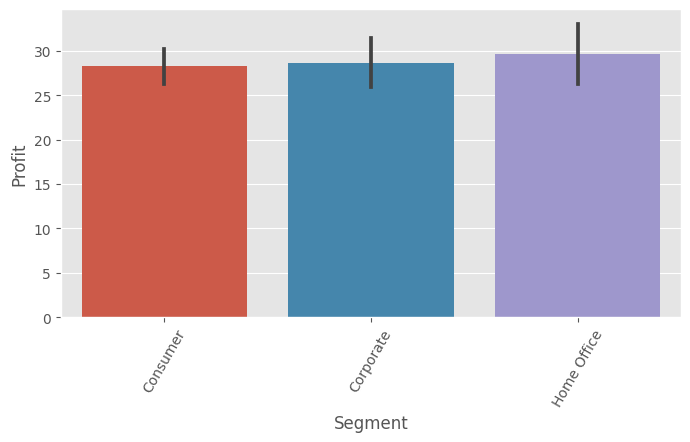

,mean,ratio
Segment,,
Consumer,28.25,97.99
Corporate,28.60,99.18
Home Office,29.65,102.83


In [33]:
# which segment is most profitable?

plt.figure(figsize=(8,4))

sns.barplot(x="Segment",y="Profit",data=df)
plt.xticks(rotation=60)
plt.show()

a=df.groupby(["Segment"])["Profit"].mean()
b=100 * a / a.mean()
c=pd.concat([a,b],axis=1)
c.columns=["mean","ratio"]
c



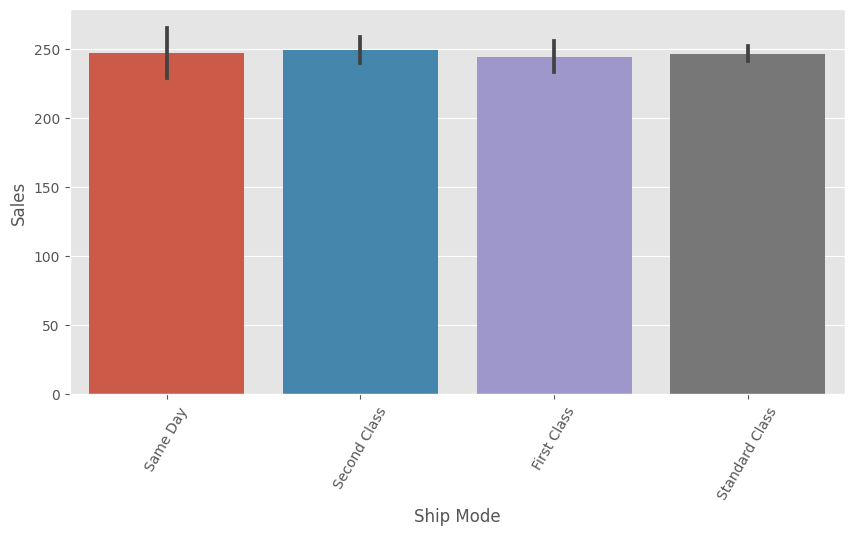

,sum,mean,ratio sum,ration mean
Ship Mode,,,,
First Class,1830976.14,243.97,14.48,24.74
Same Day,667201.98,247.02,5.28,25.05
Second Class,2565671.68,248.88,20.29,25.24
Standard Class,7578652.11,246.26,59.95,24.97


In [34]:
# relation between ship mode and Sales

plt.figure(figsize=(10,5))
sns.barplot(x="Ship Mode",y="Sales",data=df)
plt.xticks(rotation=60)
plt.show()

a=df.groupby(["Ship Mode"])["Sales"].agg(["sum","mean"])
b=100 * a / a.sum()
c=pd.concat([a,b],axis=1)
c.columns=["sum","mean","ratio sum","ration mean"]
c

In [35]:
# customers who contribute most sales in last 6 months


a=df[df["order_date"]>="2014-07-01"].groupby(["Customer Name","Segment"]).agg({"Sales":"sum"}).sort_values("Sales",ascending=False)
b1=100*a/a.sum()
c=pd.concat([a.head(10),b1.head(10)],axis=1)
c.columns=["Sales","Ratio according to last 6 months"]
c

,,Sales,Ratio according to last 6 months
Customer Name,Segment,,
Tom Ashbrook,Home Office,21272.55,0.79
Hunter Lopez,Consumer,14761.29,0.55
Bill Eplett,Home Office,12877.37,0.48
Vivek Grady,Corporate,12256.66,0.46
Barry Franz,Home Office,12211.32,0.46
Grant Thornton,Corporate,11821.65,0.44
Harry Greene,Consumer,11124.98,0.42
Delfina Latchford,Consumer,11110.60,0.41
Natalie Fritzler,Consumer,11031.82,0.41


In [36]:
# customers who contribute most profit in last 6 months


a=df[df["order_date"]>="2014-07-01"].groupby(["Customer Name","Segment"]).agg({"Profit":"sum"}).sort_values("Profit",ascending=False)
b1=100*a/a.sum()
c=pd.concat([a.head(10),b1.head(10)],axis=1)
c.columns=["Profit","Ratio according to last 6 months"]
c
 

,,Profit,Ratio according to last 6 months
Customer Name,Segment,,
Hunter Lopez,Consumer,5313.93,1.67
Tom Ashbrook,Home Office,5154.85,1.62
Bill Eplett,Home Office,3834.56,1.21
Patrick Jones,Corporate,3707.53,1.17
Rick Wilson,Corporate,2883.51,0.91
Dave Poirier,Corporate,2849.69,0.90
Dave Kipp,Consumer,2825.69,0.89
Carlos Daly,Consumer,2481.36,0.78
Mitch Webber,Consumer,2466.68,0.78


In [37]:
# countires with the most profit in first and last 6 months in 2014 
 
a=df[df["order_date"]>="2014-07-01"].groupby("Country").agg({"Profit":"sum"}).sort_values("Profit",ascending=False)
a1=df[df["order_date"]<="2014-06-30"].groupby("Country").agg({"Profit":"sum"}).sort_values("Profit",ascending=False)
b=100 * a1 / a1.sum()
b1=100*a/a.sum()
c=pd.concat([a.head(10),b.head(10),b1.head(10)],axis=1) 
c.columns=["Profit in last 6 month","Ratio according to first 6 months","Ratio according to last 6 months"]
c

,Profit in last 6 month,Ratio according to first 6 months,Ratio according to last 6 months
Country,,,
United States,54569.53,20.16,17.19
China,31354.93,10.38,9.87
India,29301.79,8.68,9.23
Germany,24391.37,7.21,7.68
United Kingdom,22715.29,7.76,7.15
France,19595.71,7.78,6.17
Mexico,17911.17,7.38,5.64
Australia,15722.55,7.67,4.95
Brazil,13361.34,NaN,4.21


In [38]:
# countires with the most sales in first and last 6 months in 2014 
 
a=df[df["order_date"]>="2014-07-01"].groupby("Country").agg({"Sales":"sum"}).sort_values("Sales",ascending=False)
a1=df[df["order_date"]<="2014-06-30"].groupby("Country").agg({"Sales":"sum"}).sort_values("Sales",ascending=False)
b=100 * a1 / a1.sum()
b1=100*a/a.sum()
c=pd.concat([a.head(15),b.head(15),b1.head(15)],axis=1) 
c.columns=["Sales in last 6 month","Ratio according to first 6 months","Ratio according to last 6 months"]
c

,Sales in last 6 month,Ratio according to first 6 months,Ratio according to last 6 months
Country,,,
United States,481028.00,18.23,17.96
France,182232.04,6.79,6.81
Australia,171427.77,7.56,6.40
Germany,137879.14,4.93,5.15
China,133935.28,5.69,5.00
Mexico,128310.53,4.96,4.79
India,126553.60,4.65,4.73
United Kingdom,109092.59,4.21,4.07
Indonesia,101594.93,3.04,3.79


In [39]:
# countires with the most discount in first and last 6 months in 2014 
 
a=df[df["order_date"]>="2014-07-01"].groupby("Country").agg({"Discount":"mean"}).sort_values("Discount",ascending=False)
a1=df[df["order_date"]<="2014-06-30"].groupby("Country").agg({"Discount":"mean"}).sort_values("Discount",ascending=False)
# b=100 * a1 / a1.sum()
# b1=100*a/a.sum()
c=pd.concat([a.head(10)],axis=1) 
c.columns=["Discount in last 6 month"]
c


,Discount in last 6 month
Country,
Zimbabwe,0.70
Lithuania,0.70
Turkmenistan,0.70
United Arab Emirates,0.70
Kazakhstan,0.70
Nigeria,0.70
Yemen,0.70
Uganda,0.70
Turkey,0.60


In [40]:
# segment of customers who has the most profit in last 6 months

a=df[df["order_date"]>="2014-07-01"].groupby("Segment").agg({"Profit":"sum"}).sort_values("Profit",ascending=False)
a1=df[df["order_date"]<="2014-06-30"].groupby("Segment").agg({"Profit":"sum"}).sort_values("Profit",ascending=False)
b=100 * a1 / a1.sum()
b1=100*a/a.sum()
c=pd.concat([a,b,b1],axis=1)
c.columns=["Profit","Ratio according to first 6 month","Ratio according to last 6 months"]
c


,Profit,Ratio according to first 6 month,Ratio according to last 6 months
Segment,,,
Consumer,156244.35,51.57,49.20
Corporate,87969.78,30.72,27.70
Home Office,73327.03,17.71,23.09


In [41]:
# segment of customers who has the most sales in last 6 months


a=df[df["order_date"]>="2014-07-01"].groupby("Segment").agg({"Sales":"sum"}).sort_values("Sales",ascending=False)
a1=df[df["order_date"]<="2014-06-30"].groupby("Segment").agg({"Sales":"sum"}).sort_values("Sales",ascending=False)
b=100 * a1 / a1.sum()
b1=100*a/a.sum()
c=pd.concat([a,b,b1],axis=1)
c.columns=["Sales","Ratio according to first 6 month","Ratio according to last 6 months"]
c

,Sales,Ratio according to first 6 month,Ratio according to last 6 months
Segment,,,
Consumer,1341096.06,51.85,50.08
Corporate,789664.14,30.46,29.49
Home Office,546912.01,17.69,20.42


In [42]:
# segment of customers who has the most shipping cost in last 6 months

a=df[df["order_date"]>="2014-07-01"].groupby("Segment").agg({"Shipping Cost":"sum"}).sort_values("Shipping Cost",ascending=False)
a1=df[df["order_date"]<="2014-06-30"].groupby("Segment").agg({"Shipping Cost":"sum"}).sort_values("Shipping Cost",ascending=False)
b=100 * a1 / a1.sum()
b1=100*a/a.sum()
c=pd.concat([a,b,b1],axis=1)
c.columns=["Shipping Cost","Ratio according to first 6 month","Ratio according to last 6 months"]
c

,Shipping Cost,Ratio according to first 6 month,Ratio according to last 6 months
Segment,,,
Consumer,143422.97,52.08,49.59
Corporate,86611.97,30.45,29.95
Home Office,59187.53,17.47,20.46


In [43]:
# category of products who has the most sales in last 6 months


a=df[df["order_date"]>="2014-07-01"].groupby("Category").agg({"Sales":"sum"}).sort_values("Sales",ascending=False)
a1=df[df["order_date"]<="2014-06-30"].groupby("Category").agg({"Sales":"sum"}).sort_values("Sales",ascending=False)
b=100 * a1 / a1.sum()
b1=100*a/a.sum()
c=pd.concat([a,b,b1],axis=1)
c.columns=["Sales","Ratio according to first 6 month","Ratio according to last 6 months"]
c

,Sales,Ratio according to first 6 month,Ratio according to last 6 months
Category,,,
Technology,1025259.68,37.32,38.29
Furniture,855805.29,32.67,31.96
Office Supplies,796607.24,30.01,29.75


In [44]:
# category of products who has the most profit in last 6 months


a=df[df["order_date"]>="2014-07-01"].groupby("Category").agg({"Profit":"sum"}).sort_values("Profit",ascending=False)
a1=df[df["order_date"]<="2014-06-30"].groupby("Category").agg({"Profit":"sum"}).sort_values("Profit",ascending=False)
b=100 * a1 / a1.sum()
b1=100*a/a.sum()
c=pd.concat([a,b,b1],axis=1)
c.columns=["Profit","Ratio according to first 6 month","Ratio according to last 6 months"]
c

,Profit,Ratio according to first 6 month,Ratio according to last 6 months
Category,,,
Technology,149843.53,44.69,47.19
Office Supplies,111612.12,35.38,35.15
Furniture,56085.52,19.92,17.66


In [45]:
# category of products who has the most shipping cost in last 6 months


a=df[df["order_date"]>="2014-07-01"].groupby("Category").agg({"Shipping Cost":"sum"}).sort_values("Shipping Cost",ascending=False)
a1=df[df["order_date"]<="2014-06-30"].groupby("Category").agg({"Shipping Cost":"sum"}).sort_values("Shipping Cost",ascending=False)
b=100 * a1 / a1.sum()
b1=100*a/a.sum()
c=pd.concat([a,b,b1],axis=1)
c.columns=["Shipping Cost","Ratio according to first 6 month","Ratio according to last 6 months"]
c

,Shipping Cost,Ratio according to first 6 month,Ratio according to last 6 months
Category,,,
Technology,109481.71,37.38,37.85
Furniture,94429.86,32.52,32.65
Office Supplies,85310.90,30.10,29.50


In [46]:
#Sub-Category of products who has the most sales in last 6 months


a=df[df["order_date"]>="2014-07-01"].groupby("Sub-Category").agg({"Sales":"sum"}).sort_values("Sales",ascending=False)
a1=df[df["order_date"]<="2014-06-30"].groupby("Sub-Category").agg({"Sales":"sum"}).sort_values("Sales",ascending=False)
b=100 * a1 / a1.sum()
b1=100*a/a.sum()
c=pd.concat([a,b,b1],axis=1)
c.columns=["Sales","Ratio according to first 6 month","Ratio according to last 6 months"]
c


,Sales,Ratio according to first 6 month,Ratio according to last 6 months
Sub-Category,,,
Phones,360190.53,13.51,13.45
Copiers,337452.08,11.76,12.60
Bookcases,324297.69,11.46,12.11
Chairs,301107.06,12.05,11.25
Appliances,230008.87,7.84,8.59
Storage,221671.93,9.09,8.28
Machines,166222.39,6.15,6.21
Accessories,161394.68,5.90,6.03
Tables,149559.38,6.10,5.59


In [47]:
#Sub-Category of products who has the most Profit in last 6 months


a=df[df["order_date"]>="2014-07-01"].groupby("Sub-Category").agg({"Profit":"sum"}).sort_values("Profit",ascending=False)
a1=df[df["order_date"]<="2014-06-30"].groupby("Sub-Category").agg({"Profit":"sum"}).sort_values("Profit",ascending=False)
b=100 * a1 / a1.sum()
b1=100*a/a.sum()
c=pd.concat([a,b,b1],axis=1)
c.columns=["Profit","Ratio according to first 6 month","Ratio according to last 6 months"]
c

,Profit,Ratio according to first 6 month,Ratio according to last 6 months
Sub-Category,,,
Copiers,66704.70,16.68,21.01
Phones,43851.34,15.03,13.81
Bookcases,40941.08,10.52,12.89
Appliances,36432.70,9.15,11.47
Accessories,27919.73,8.84,8.79
Chairs,24710.96,10.06,7.78
Storage,22948.93,7.44,7.23
Paper,13646.26,3.96,4.30
Art,12406.08,3.96,3.91


In [48]:
#Sub-Category of products who has the most Shipping Cost in last 6 months


a=df[df["order_date"]>="2014-07-01"].groupby("Sub-Category").agg({"Shipping Cost":"sum"}).sort_values("Shipping Cost",ascending=False)
a1=df[df["order_date"]<="2014-06-30"].groupby("Sub-Category").agg({"Shipping Cost":"sum"}).sort_values("Shipping Cost",ascending=False)
b=100 * a1 / a1.sum()
b1=100*a/a.sum()
c=pd.concat([a,b,b1],axis=1)
c.columns=["Shipping Cost","Ratio according to first 6 month","Ratio according to last 6 months"]
c

,Shipping Cost,Ratio according to first 6 month,Ratio according to last 6 months
Sub-Category,,,
Phones,40785.68,13.55,14.10
Bookcases,35744.96,11.26,12.36
Copiers,34256.87,11.78,11.84
Chairs,32337.55,12.40,11.18
Appliances,24382.75,7.89,8.43
Storage,23793.48,9.10,8.23
Accessories,18266.42,6.13,6.32
Tables,17381.77,5.87,6.01
Machines,16172.74,5.92,5.59


In [49]:
#Market of products who has the most Sales in last 6 months


a=df[df["order_date"]>="2014-07-01"].groupby("Market").agg({"Sales":"sum"}).sort_values("Sales",ascending=False)
a1=df[df["order_date"]<="2014-06-30"].groupby("Market").agg({"Sales":"sum"}).sort_values("Sales",ascending=False)
b=100 * a1 / a1.sum()
b1=100*a/a.sum()
c=pd.concat([a,b,b1],axis=1)
c.columns=["Sales","Ratio according to first 6 month","Ratio according to last 6 months"]
c

,Sales,Ratio according to first 6 month,Ratio according to last 6 months
Market,,,
APAC,724070.18,28.72,27.04
EU,642999.72,23.03,24.01
US,481028.00,18.23,17.96
LATAM,473840.90,16.97,17.70
EMEA,172079.78,6.36,6.43
Africa,167522.43,6.18,6.26
Canada,16131.21,0.51,0.60


In [50]:
#Market of products who has the most Profit in last 6 months


a=df[df["order_date"]>="2014-07-01"].groupby("Market").agg({"Profit":"sum"}).sort_values("Profit",ascending=False)
a1=df[df["order_date"]<="2014-06-30"].groupby("Market").agg({"Profit":"sum"}).sort_values("Profit",ascending=False)
b=100 * a1 / a1.sum()
b1=100*a/a.sum()
c=pd.concat([a,b,b1],axis=1)
c.columns=["Profit","Ratio according to first 6 month","Ratio according to last 6 months"]
c

,Profit,Ratio according to first 6 month,Ratio according to last 6 months
Market,,,
APAC,93293.77,29.80,29.38
EU,79797.78,25.48,25.13
US,54569.53,20.16,17.19
LATAM,48720.94,15.04,15.34
Africa,23438.64,5.69,7.38
EMEA,14041.07,2.60,4.42
Canada,3679.44,1.23,1.16


In [51]:
#Market of products who has the most Shipping Cost in last 6 months


a=df[df["order_date"]>="2014-07-01"].groupby("Market").agg({"Shipping Cost":"sum"}).sort_values("Shipping Cost",ascending=False)
a1=df[df["order_date"]<="2014-06-30"].groupby("Market").agg({"Shipping Cost":"sum"}).sort_values("Shipping Cost",ascending=False)
b=100 * a1 / a1.sum()
b1=100*a/a.sum()
c=pd.concat([a,b,b1],axis=1)
c.columns=["Shipping Cost","Ratio according to first 6 month","Ratio according to last 6 months"]
c

,Shipping Cost,Ratio according to first 6 month,Ratio according to last 6 months
Market,,,
APAC,77327.38,29.13,26.74
EU,67066.61,22.79,23.19
LATAM,54009.82,16.94,18.67
US,52416.06,17.47,18.12
EMEA,18649.81,6.56,6.45
Africa,18015.75,6.59,6.23
Canada,1737.04,0.53,0.60
